In [1]:
import pybgs

In [4]:
vids = [
'/home/nate/Videos/20200327-kitchen-ir.mp4',
'/home/nate/Videos/20200327-kitchen-vis.avi',
'/home/nate/Videos/20200328-kitchen1-ir.mp4',
'/home/nate/Videos/20200328-kitchen1-vis.avi',
'/home/nate/Videos/20200328-kitchen-ir.mp4',
'/home/nate/Videos/20200328-kitchen-vis.avi',
]

vid=vids[3]
vid

'/home/nate/Videos/20200328-kitchen1-vis.avi'

In [37]:
import matplotlib.pyplot as plt
from IPython import display

In [28]:
%matplotlib inline

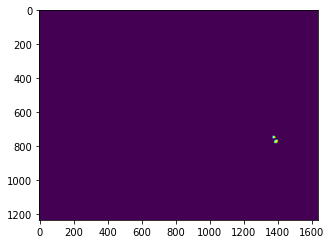

129

In [ ]:
import numpy as np
import cv2
import pybgs

params = { 
 #'algorithm': 'DPWrenGA', 
 'threshold': 1.225e01,
 'alpha': 2.99e-03,
 'learning_frames': 15
}

#algorithm = pybgs.DPWrenGA()
algorithm = pybgs.AdaptiveSelectiveBackgroundLearning()

camera_source = cv2.VideoCapture(vid)

i = 0
err, frame = camera_source.read()
high_threshold_mask = np.zeros(shape=frame.shape[0:2], dtype=np.uint8)
low_threshold_mask = np.zeros_like(high_threshold_mask)
#bg_sub.init_model(img, params)

#while cv2.waitKey(30) == -1:
while True:
    i += 1
    display.display(i)
    if i<100:
        continue
    err, frame = camera_source.read()
    
    mask = algorithm.apply(frame)
    bgmodel = algorithm.getBackgroundModel()

    plt.imshow(mask, label='img_output')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #plt.imshow(img_bgmodel, label='img_bgmodel')
    if i>200:
        break

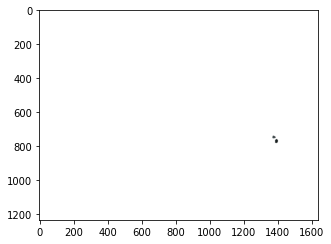

In [66]:
# HOW TO APPLY A MASK
colored=frame.copy()
colored[mask==0] = (255,255,255)
plt.imshow(colored)

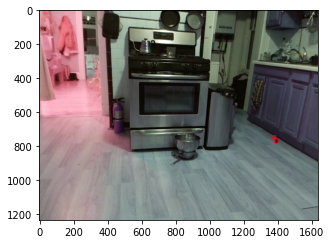

In [88]:
# HOW TO DRAW A NORMAL BOUNDING BOX
# SEE https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
contours, what = cv2.findContours(mask.copy(),1,1)
rects = [cv2.minAreaRect(contour) for contour in contours]
boxes = [cv2.boxPoints(rect) for rect in rects]
boxes = [np.int0(box) for box in boxes]
rect2 = cv2.drawContours(frame.copy(),boxes,-1,(255,0,0),3)

plt.imshow(rect2)